In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from os import path as Path
from sklearn.model_selection import train_test_split 
# We load our script for the neural network
from tools import FeedNeuralNet_angle_pred as ap
# Magic command to plot inline
%matplotlib inline

## Head orientation from thorax orientation prediction

We aim in this notebook to find a suitable method to classify a bumbleflight Head orientation from its thorax (also refered as body in code) orientation during a time interval $\Delta t$. 

$$ H(t) = f( w_z^\text{thorax}(t-n), \cdots, w_z^\text{thorax}(t+n) )$$

here:

* $H(t)$ is the orientation (yaw, pitch, roll) of the head at time t
* $f$ is a classifier function
* $w_z^\text{thorax}$ is the angular velocity in the thorax coordinate system around the z axis
* $n$ is the n obersvation such that $2n\approx\Delta$

Monitoring the heas orientation of free-flying insects is a cumbersome task due to the small size of an insect head. Therefore, most research has estimated the start and end of saccade baded on the time course of the thorax orientation. However, the thorax turning slower than the hea, some intersaccade may be merged by missing detection saccade and thus misleading the researcher about when spatial information can be measured.

To perform long intersaccade, the insects need to orchestrate the motion of its head and thorax. So far, little is known about the computational complexity of this orchestration and the relation beween head and thorax rotation.

Here by using experiemntal data of head and thorax orientation during the learning flight of bumblebees, Bombus terrestris, and using neural networks, we investigat the complexity of the orchestration between the head and thorax orientation. In this regard the complexity of the neural network aka the hidden layer size, the window size of the input and the shift of the input was interesting to us. The bigger the hidden layer must be in order to get a good result, the more complex the function f and therefore the relationship between the head and thorax orientation. The same holds for the window size, if a large input window is needed to obtain a statisfying result, the more temporal information the neural network needs and therefore the more difficult it is to predict the head from the thorax. The temporal shift ...

To do so, in this tutorial we train a neural network for every window size, hidden layer size and shift and compare the results. The more neurons are needed and the bigger the window size, the more complexe is the relationship between head and thorax orientation.

However, in this part of the tutorial we will give a simple example on how to train one single network for one specific hidden layer size, one specific window size and no shift.

### Where are the data


The already prepared flight trajectories are stored in a hdf files, where every flight is indexed by a number.


In [2]:
# Load list of flights we have
flight_ids = ['05','06','07','08','11']
# Load the results from splitted nonans
head_filename_result_blocknonans =  'chapter_1_results/head_thorax_data_blk.h5'
training_flights = flight_ids

### specify parameters

Next we need to specify how many neurons we want to use (units), which window size and the shift. The headbody value indicates weather or not we want to predict head from thorax or thorax from head. Here we want to predict head from thorax so we set it to False.

In [3]:
window_size = 33
units = 32
shift = None
headbody = False

### load the data

Next we need the input for the neural network (observations) and the output (target). For this we simply call the prepare_data function from the FeedNeuralNet_angle_pred model in the tools directory. It this function also return the error, which is explained in tutorial 1.
for this the we simply pass the filename with its path, which flight and window size we want to use, as well as the shift and if we want to use head from thorax prediction or vice versa. 
This will return the yaw velocity of the thorax as observation and yaw velocity of the head as target

In [4]:
observations, target, error = ap.prepare_data(head_filename_result_blocknonans,
                                                  training_flights,
                                                  window_size = window_size,
                                                  headbody = headbody,
                                                  shift = shift)

### Train Test Split

Next we need to split the data in training and test set. For this we can use sklearn's train_test_split method, which we apply to every flight.


In [5]:
tmpsplit = target.groupby('beeid').apply(lambda x: train_test_split(x, test_size=0.3, shuffle=False))
train_index = list()
test_index = list()
# put train and test in own dataframe, as well as the error
for beeid, row in tmpsplit.iteritems():
    train_index.extend(row[0].index.tolist())
    test_index.extend(row[1].index.tolist())
train_x, train_y = observations.loc[train_index], target.loc[train_index]
test_x, test_y = observations.loc[test_index], target.loc[test_index]
test_error = error.loc[test_index]
# resize to make it usable for the model later on
train_y = train_y[:, np.newaxis]
 

<ipython-input-5-0091e844d1e8>:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  train_y = train_y[:, np.newaxis]


### Train the model

Now we train the model. For that we can easy obtain a model by calling FeedNeuralNet_angle_pred's build_network function. We simply need to pass the training data and the wanted number of neurons. The rest is done automatically.

In [6]:
model = ap.build_network(train_x,train_y,units = units)

### Train the model

We now fit the model on the training data

In [7]:
history = model.fit(train_x,
                    np.vstack([train_y[:,0],train_x.loc[:,0]]).transpose(), 
                    epochs=30, batch_size=10, verbose=2)



Epoch 1/30
1485/1485 - 2s - loss: 0.9962
Epoch 2/30
1485/1485 - 2s - loss: 0.0071
Epoch 3/30
1485/1485 - 2s - loss: 0.0057
Epoch 4/30
1485/1485 - 2s - loss: 0.0054
Epoch 5/30
1485/1485 - 2s - loss: 0.0053
Epoch 6/30
1485/1485 - 2s - loss: 0.0052
Epoch 7/30
1485/1485 - 2s - loss: 0.0053
Epoch 8/30
1485/1485 - 2s - loss: 0.0052
Epoch 9/30
1485/1485 - 2s - loss: 0.0053
Epoch 10/30
1485/1485 - 2s - loss: 0.0053
Epoch 11/30
1485/1485 - 2s - loss: 0.0053
Epoch 12/30
1485/1485 - 2s - loss: 0.0052
Epoch 13/30
1485/1485 - 2s - loss: 0.0052
Epoch 14/30
1485/1485 - 2s - loss: 0.0053
Epoch 15/30
1485/1485 - 2s - loss: 0.0053
Epoch 16/30
1485/1485 - 2s - loss: 0.0052
Epoch 17/30
1485/1485 - 2s - loss: 0.0053
Epoch 18/30
1485/1485 - 2s - loss: 0.0051
Epoch 19/30
1485/1485 - 2s - loss: 0.0051
Epoch 20/30
1485/1485 - 2s - loss: 0.0052
Epoch 21/30
1485/1485 - 2s - loss: 0.0051
Epoch 22/30
1485/1485 - 2s - loss: 0.0051
Epoch 23/30
1485/1485 - 2s - loss: 0.0051
Epoch 24/30
1485/1485 - 2s - loss: 0.0051
E

### Predict and analyse the result

Here we calculate adequate error measures like the error in angles, as we are dealing with angles this might be more accurate than other common error measures.

In [8]:
# Use the model to make prediction
pred = model.predict(test_x)
# 
test_target = test_y
test_observations = test_x
test_target_error = test_error
# Calculate the angle from the two network output
pred_angle = np.arctan2(pred[:,1],pred[:,0])
pred_angle = pd.Series(pred_angle,index=test_target.index)
# and norm   
pred_norm = np.sqrt(pred[:,1]**2+pred[:,0]**2)
# Calculate the error angle
error_angle = np.arccos( np.cos(pred_angle)*np.cos(test_target)
                         +np.sin(pred_angle)*np.sin(test_target))
error_angle = np.rad2deg(error_angle)

/home/bolirev/.virtualenvs/exp-2020/lib/python3.8/site-packages/pandas-1.1.2-py3.8-linux-x86_64.egg/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in arccos
  result = getattr(ufunc, method)(*inputs, **kwargs)


### Visualize the result

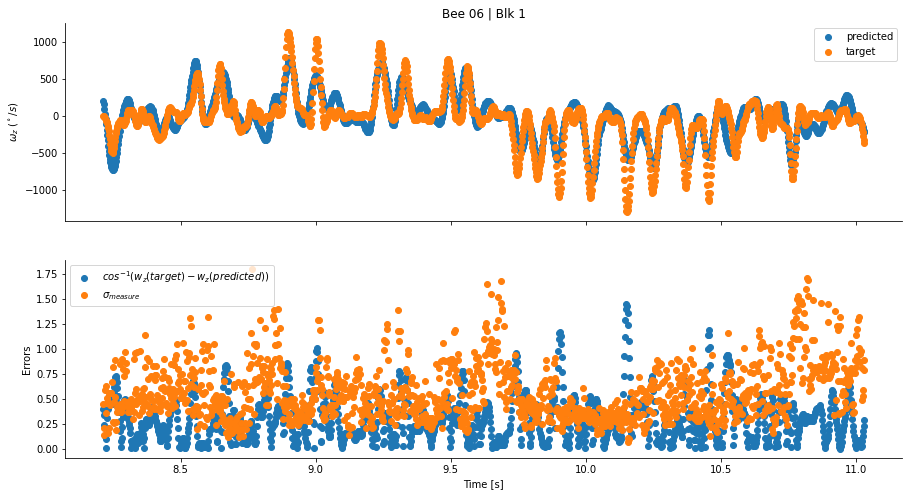

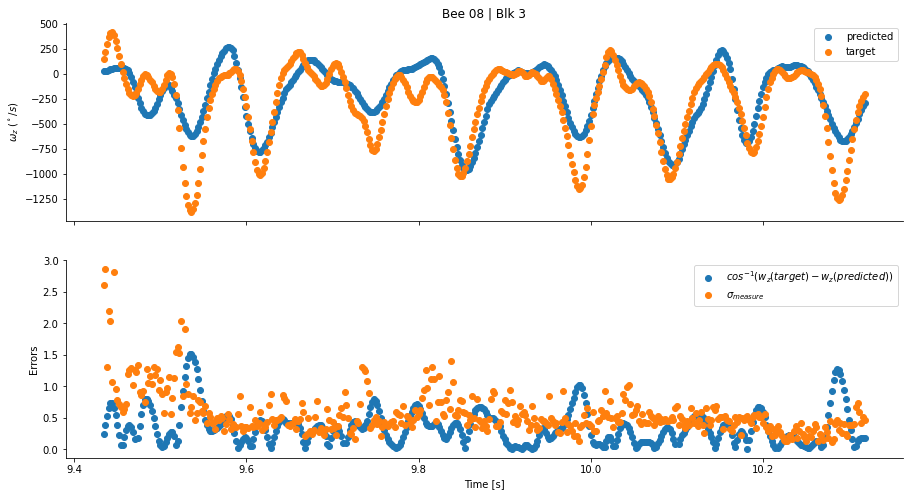

In [9]:
fps = 500

for gname in pred_angle.groupby(['beeid','blk_i']).groups.keys():
    if pred_angle.xs(gname).shape[0]<=300:
        continue
    fig, axarr = plt.subplots(2,1, figsize=(15,8),sharex=True)
    ax=axarr[0]
    ax.scatter(pred_angle.xs(gname).index/fps, np.rad2deg(pred_angle.xs(gname))*fps, label='predicted')
    ax.scatter(test_target.xs(gname).index/fps, np.rad2deg(test_target.xs(gname))*fps, label='target')
    #ax.scatter(test_observations.xs(gname).index/fps, np.rad2deg(test_observations.xs(gname))*fps, label='input (t=0)')
    ax.legend()
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.set_ylabel('$\omega_z$ ($^\circ/s$)')
    ax.set_title('Bee {} | Blk {}'.format(gname[0],gname[1]))
    ax=axarr[1]
    ax.scatter(error_angle.xs(gname).index/fps, 
            error_angle.xs(gname), label = '$cos^{-1}(w_z(target) - w_z(predicted))$')
    ax.scatter(test_target_error.xs(gname).index/fps, 
            np.rad2deg(test_target_error.xs(gname)), label = '$\sigma_{measure}$')
    ax.legend()
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.set_ylabel('Errors')
    ax.set_xlabel('Time [s]')
#plt.savefig('plotted_results.png')